# Analysis of: hazardst_stress.sql
#### File originally retrieved from: http://http://www.bitleak.net/Thread-Hazard-Stresser-Database-Dump

In [1]:
dumpfile='hazardst_stress.sql'

## * Libraries that I use to analyse data

In [4]:
import pandas as pd
import numpy as np

from io import StringIO
import re

In [2]:
%run '../additional_functions.ipynb'

 Functions loaded!!!!


<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 1: Adaptation to our Booter database schema<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

## 1. Taking a look on the raw dump file (first 100 lines)

In [5]:
lines_to_read=100

with open(dumpfile) as myfile:
    firstlines=myfile.readlines()[0:lines_to_read] #put here the interval you want
    for x in firstlines:
        print(x.strip())

-- phpMyAdmin SQL Dump
-- version 3.5.5
-- http://www.phpmyadmin.net
--
-- Host: localhost
-- Generation Time: Apr 11, 2013 at 09:11 AM
-- Server version: 5.1.68-cll
-- PHP Version: 5.3.17

SET SQL_MODE="NO_AUTO_VALUE_ON_ZERO";
SET time_zone = "+00:00";


/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;
/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;
/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;
/*!40101 SET NAMES utf8 */;

--
-- Database: `hazardst_stress`
--

-- --------------------------------------------------------

--
-- Table structure for table `blacklist`
--

CREATE TABLE IF NOT EXISTS `blacklist` (
`ID` int(11) NOT NULL AUTO_INCREMENT,
`IP` varchar(15) NOT NULL,
`note` text NOT NULL,
PRIMARY KEY (`ID`)
) ENGINE=MyISAM  DEFAULT CHARSET=latin1 AUTO_INCREMENT=51 ;

--
-- Dumping data for table `blacklist`
--

INSERT INTO `blacklist` (`ID`, `IP`, `note`) VALUES
(41, '127.0.0.1', 'dont remove'),
(42, '127.0.0.1', 'Localhost'

## 2. Listing tables that have content inserted into the dump file

In [6]:
(pd.Series(list_tables_with_insert(dumpfile)).value_counts()).sort_index()

blacklist     1
fe            1
gateway       1
iplogs        1
logs          1
lr            1
news          1
payments      1
plans         1
servers       1
settings      1
sitelink      1
sitetheme     1
skype_logs    1
skypeapi      1
users         1
dtype: int64

<h2 align='center'>======================================================================<br>
If NOT well-formed SQL dump file then you must first do the following:
======================================================================</h2>

## 3. Removing lines that are not part of the actual content to be analysed

## 4. Splitting and naming tables and columns

<h2 align='center'>======================================================================
Adapting EACH existing table
======================================================================</h2>

## 5.1. Table: 'blacklist'

In [7]:
tablename='blacklist'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,IP,note
0,41,127.0.0.1,dont remove
1,42,127.0.0.1,Localhost
2,43,141.101.121.10,Hack forums
3,47,72.21.81.85,FBI DO NOT REMOVE
4,48,198.81.129.107,CIA


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: blacklist
    - The blacklist table must to have the columns: id, ip, and note
#### Q3: Are there modifications required? YES
    - On the table name: NO
    - On the column type: NO
    - On the column name:
        o ID => id
        o IP => ip
    - Add required columns: NO

## 5.1 Loading the modified table: 'blacklist'

In [8]:
df_blacklist = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                           delimiter=",",
                           error_bad_lines=False)

df_blacklist.rename(columns = {'ID': 'id',
                               'IP':'ip'},
                    inplace=True)
df_blacklist

,id,ip,note
0,41,127.0.0.1,dont remove
1,42,127.0.0.1,Localhost
2,43,141.101.121.10,Hack forums
3,47,72.21.81.85,FBI DO NOT REMOVE
4,48,198.81.129.107,CIA


## 5.2. Table: 'fe'

In [9]:
tablename='fe'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,userID,type,ip,note
0,6,50,e,74.197.70.58,DinosaurPhoneFaggot
1,40,55473,e,24.29.209.124,Rox Treats
2,8,55408,f,101.119.16.166,Brooke
3,9,55408,f,69.171.237.11,Lara
4,10,55473,e,173.168.120.50,tricks
5,11,55473,e,76.122.153.50,Nturl Blur
6,12,55473,e,68.47.220.26,Frost
7,13,55510,f,94.236.162.145,www.openmu.com
8,14,55475,e,108.13.167.70,NaN
9,15,55547,f,75.65.207.197,LANDON


### Observations compared to generic Booter database schema
    - This table looks like: friendsenemies
    - The friendsenemies table must to have the columns: id, note, userid, and type
### Modifications 
    - On the column name:
        + ID changes to id, 
        + userID changes to userid;

## Loading the modified table: 'fe'

In [10]:
df_friendsenemies = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

df_friendsenemies.rename(columns = {'ID': 'id',
                               'userID':'userid'},
                    inplace=True)

df_friendsenemies.head(10)

,id,userid,type,ip,note
0,6,50,e,74.197.70.58,DinosaurPhoneFaggot
1,40,55473,e,24.29.209.124,Rox Treats
2,8,55408,f,101.119.16.166,Brooke
3,9,55408,f,69.171.237.11,Lara
4,10,55473,e,173.168.120.50,tricks
5,11,55473,e,76.122.153.50,Nturl Blur
6,12,55473,e,68.47.220.26,Frost
7,13,55510,f,94.236.162.145,www.openmu.com
8,14,55475,e,108.13.167.70,NaN
9,15,55547,f,75.65.207.197,LANDON


## 5.3. Table: 'gateway'

In [11]:
tablename='gateway'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,email
0,misterp30@icloud.com


### Observations compared to generic Booter database schema
    - This table looks like: gateways
    - The gateways table must to have the columns: email
### Modifications 
    - On the table name: gateway becomes gateways.
    - On the column name: no modification requires.

## Loading the modified table: 'gateway'

In [12]:
df_gateways = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

df_gateways.head(10)

,email
0,misterp30@icloud.com


## 5.4. Read the raw table: 'iplogs'

In [98]:
tablename='iplogs'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,userID,logged,date
0,16,55388,77.126.24.144,1354474645
1,17,55388,77.126.24.144,1354474652
2,18,55408,69.171.237.11,1354688757
3,19,55408,211.30.228.242,1354688757
4,20,55408,101.119.16.166,1354688821
5,21,55408,101.119.16.166,1354688942
6,22,55408,122.106.80.6,1354689641
7,23,55408,122.106.80.6,1354689651
8,24,55408,122.106.80.6,1354689671
9,25,55408,49.2.16.250,1354689897


*Is this table exactly the same as any other previous loaded table? NO
### Observations compared to generic Booter database schema
    - This table looks like: logins
### Modifications 
    - On the table name: 
        o iplogs => logins
    - Convert column:
        o date => timestamp2datetime
    - On the column name: 
        o ID => id
        o userID => userid
        o logged => userip

## Loading the modified table: 'iplogs'

In [99]:
df_logins = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

df_logins['date']=timestamp2datetime(df_logins['date'])

df_logins.rename(columns = {'ID': 'id',
                            'userID':'userid',
                            'logged': 'userip'},
                    inplace=True)

df_logins['username']=np.nan

df_logins.head(10)

,id,userid,userip,date,username
0,16,55388,77.126.24.144,2012-12-02 18:57:25,NaN
1,17,55388,77.126.24.144,2012-12-02 18:57:32,NaN
2,18,55408,69.171.237.11,2012-12-05 06:25:57,NaN
3,19,55408,211.30.228.242,2012-12-05 06:25:57,NaN
4,20,55408,101.119.16.166,2012-12-05 06:27:01,NaN
5,21,55408,101.119.16.166,2012-12-05 06:29:02,NaN
6,22,55408,122.106.80.6,2012-12-05 06:40:41,NaN
7,23,55408,122.106.80.6,2012-12-05 06:40:51,NaN
8,24,55408,122.106.80.6,2012-12-05 06:41:11,NaN
9,25,55408,49.2.16.250,2012-12-05 06:44:57,NaN


## 5.5. Read the raw table: 'logs'

In [73]:
tablename='logs'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,userID,logged,date
0,16,55388,77.126.24.144,1354474645
1,17,55388,77.126.24.144,1354474652
2,18,55408,69.171.237.11,1354688757
3,19,55408,211.30.228.242,1354688757
4,20,55408,101.119.16.166,1354688821
5,21,55408,101.119.16.166,1354688942
6,22,55408,122.106.80.6,1354689641
7,23,55408,122.106.80.6,1354689651
8,24,55408,122.106.80.6,1354689671
9,25,55408,49.2.16.250,1354689897


### Is this table exactly the same as any other previous loaded table? YES (iplogs)
    * Do nothing!
### Is this table similar to any table in the generic Booter database schema? 
    - This table looks like: 
    - The  table must to have the columns: -
### Modifications 
    - On the table name: 
    - Convert column:
    - On the column name: 

## 5.6. Read the raw table: 'lr'

In [42]:
tablename='lr'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,storename,storepass,lrid
0,Sly Stresser,phoenix310,U7700723


### Is this table exactly the same as any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    - The  table must to have the columns: 
### Are there required adjustments? 
    - On the table name: 
    - On the column type:
    - On the column name: 

## 5.7. Read the raw table: 'news'

In [43]:
tablename='news'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,title,detail,date
0,22,ToS (Terms of Service,1. No refunds. 2. No chargebacks,1365648068


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? NO 
    - This table looks like: -
    - The  table must to have the columns: -
### Are there modifications required?
    - On the table name: 
    - On the column type:
    - On the column name: 

## 5.8. Read the raw table: 'payments'

In [44]:
tablename='payments'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,paid,plan,user,email,tid,date
0,1,2,25,55864,konradsenko@hotmail.com,730447104V3576257,1363038749
1,2,5,26,55860,michael120@live.nl,3M900294Y7261862G,1363042743
2,3,5,26,55875,crimewatchtt@gmail.com,2XR028731C564574Y,1363051326
3,4,5,26,55878,billing@hotservers.net,3JW09853GT390105Y,1363060180
4,5,20,27,55880,runescape0617@gmail.com,5WG75384XD256082W,1363065720
5,6,2,25,55882,PwNChocolaHD@gmail.com,11B593471U493523W,1363070417
6,7,2,25,55890,storm@ebomba.ro,2SG53730PR905211S,1363123642
7,8,30,33,55890,storm@ebomba.ro,27D205791C673071T,1363124779
8,9,5,26,55891,teflonjuan01@aol.com,4NP36572RX387190F,1363126981
9,10,12,28,55893,gl0zz3n@gmail.com,98J04628W32780214,1363137875


### Is this table completely different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: payments
    - The  table must to have the columns: id, userid, amountpaid, useremail, planid, tid, and date
### Are there modifications required? YES
    - On the table name: NO
    - On the column type:
        o date => timestamp2datetime
    - On the column name: 
        o ID => id
        o paid => amountpaid
        o plan => planid
        o user => userid
        o email => paymentemail

## Loading the modified table: 'payments'

In [45]:
df_payments = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

df_payments['date']=timestamp2datetime(df_payments['date'])

df_payments.rename(columns = {'ID': 'id',
                            'paid':'amountpaid',
                            'plan': 'planid',
                             'user': 'userid',
                             'email': 'paymentemail'},
                    inplace=True)

df_payments.head(10)

,id,amountpaid,planid,userid,paymentemail,tid,date
0,1,2,25,55864,konradsenko@hotmail.com,730447104V3576257,2013-03-11 21:52:29
1,2,5,26,55860,michael120@live.nl,3M900294Y7261862G,2013-03-11 22:59:03
2,3,5,26,55875,crimewatchtt@gmail.com,2XR028731C564574Y,2013-03-12 01:22:06
3,4,5,26,55878,billing@hotservers.net,3JW09853GT390105Y,2013-03-12 03:49:40
4,5,20,27,55880,runescape0617@gmail.com,5WG75384XD256082W,2013-03-12 05:22:00
5,6,2,25,55882,PwNChocolaHD@gmail.com,11B593471U493523W,2013-03-12 06:40:17
6,7,2,25,55890,storm@ebomba.ro,2SG53730PR905211S,2013-03-12 21:27:22
7,8,30,33,55890,storm@ebomba.ro,27D205791C673071T,2013-03-12 21:46:19
8,9,5,26,55891,teflonjuan01@aol.com,4NP36572RX387190F,2013-03-12 22:23:01
9,10,12,28,55893,gl0zz3n@gmail.com,98J04628W32780214,2013-03-13 01:24:35


## 5.9. Read the raw table: 'plans'

In [46]:
tablename='plans'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,name,description,mbt,unit,length,price
0,32,Lifetime - 1200 Seconds,Lifetime - 1200 Seconds,1200,Years,20,42.0
1,28,2 Month\\s - 600 Seconds,2 Month\\s - 600 Seconds,600,Months,2,12.0
2,30,Lifetime - 600 Seconds,Lifetime - 600 Seconds,600,Years,20,30.0
3,31,2 Month\\s - 1200 Seconds,2 Month\\s - 1200 Seconds,1200,Months,2,22.0
4,27,Lifetime - 300 Seconds,Lifetime - 300 Seconds,300,Years,20,20.0
5,25,300 Seconds - 1 Day,300 Seconds - 1 Day,300,Days,1,2.0
6,26,2 Month\\s - 300 Seconds,2 Month\\s - 300 Seconds,300,Months,2,5.0
7,33,2 Month\\s - 3600,2 Month\\s - 3600 Seconds,3600,Months,2,30.0
8,34,Lifetime - 3600 Seconds,Lifetime - 3600 Seconds,3600,Years,20,50.0
9,35,Contest Package ;,Do not buy this Package,4600,Years,10,10000000.0


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: plans
    - The  table must to have the columns: planid, planname, plandescr, price, maxboottime, and concurrency
### Are there modifications required? YES
    - On the table name: NO
    - On the column type:
    - On the column name: 
        o ID => planid
        o name => planname
        o description => plandescr
        o mbt => maxboottime
        o length => concurrency

## Loading the modified table: 'plans'

In [47]:
df_plans = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

df_plans.rename(columns = {'ID': 'planid',
                            'name': 'planname',
                          'description': 'plandescr',
                          'mbt':'maxboottime',
                          'length':'concurrency'},
                    inplace=True)

df_plans.head(10)

,planid,planname,plandescr,maxboottime,unit,concurrency,price
0,32,Lifetime - 1200 Seconds,Lifetime - 1200 Seconds,1200,Years,20,42.0
1,28,2 Month\\s - 600 Seconds,2 Month\\s - 600 Seconds,600,Months,2,12.0
2,30,Lifetime - 600 Seconds,Lifetime - 600 Seconds,600,Years,20,30.0
3,31,2 Month\\s - 1200 Seconds,2 Month\\s - 1200 Seconds,1200,Months,2,22.0
4,27,Lifetime - 300 Seconds,Lifetime - 300 Seconds,300,Years,20,20.0
5,25,300 Seconds - 1 Day,300 Seconds - 1 Day,300,Days,1,2.0
6,26,2 Month\\s - 300 Seconds,2 Month\\s - 300 Seconds,300,Months,2,5.0
7,33,2 Month\\s - 3600,2 Month\\s - 3600 Seconds,3600,Months,2,30.0
8,34,Lifetime - 3600 Seconds,Lifetime - 3600 Seconds,3600,Years,20,50.0
9,35,Contest Package ;,Do not buy this Package,4600,Years,10,10000000.0


## 5.10. Read the raw table: 'servers'

In [48]:
tablename='servers'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,id,url
0,71,http://respawnapi.com/send.php?host=&port=&tim...
1,69,http://31.3.227.80/Koala/api.php?key=X8c6Hv06f...


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: webshell
    - The  table must to have the columns: id, url, status, lastchecked, and attacktype
### Are there modifications required? YES
    - On the table name: 
        o servers => webshells
    - On the column type: -
    - On the column name: - 
    - Add required columns:
        o status, lastchecked, and attacktype

## Loading the modified table: 'servers'

In [49]:
df_webshells = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)

df_webshells['status'] = np.nan
df_webshells['lastchecked'] = np.nan
df_webshells['attacktype'] = np.nan

df_webshells.head(10)

,id,url,status,lastchecked,attacktype
0,71,http://respawnapi.com/send.php?host=&port=&tim...,NaN,NaN,NaN
1,69,http://31.3.227.80/Koala/api.php?key=X8c6Hv06f...,NaN,NaN,NaN


## 5.11. Read the raw table: 'settings'

In [50]:
tablename='settings'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,name
0,Hazard Stresser


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: settings
    - The  table must to have the columns: url, sitename, and siteemail
### Are there modifications required? YES
    - On the table name: -
    - On the column type: -
    - On the column name:
        o name => sitename
    - Add required columns:
        o url and siteemail

## Loading the modified table: 'settings'

In [51]:
df_settings = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False)
#                        converters = {'date':timestamp2datetime})

df_settings.rename(columns = {'name': 'sitename'},
                    inplace=True)

#Creating empty columns (with "" [for future string] or np.nan [for future float])
df_settings['url'] = ""
df_settings['siteemail'] = ""

df_settings.head(10)

,sitename,url,siteemail
0,Hazard Stresser,,


## 5.12. Read the raw table: 'sitelink'

In [52]:
tablename='sitelink'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,url
0,http://hazardstresser.com/


### Is this table different from any other previous loaded table? NO
    * It is part should be part of the settings table!!!
### Is this table similar to any table in the generic Booter database schema? 
    - This table looks like: 
    - The  table must to have the columns: 
### Are there modifications required? 
    - On the table name: 
    - On the column type:
    - On the column name:
    - Add required columns:


## Loading the modified table: 'sitelink'

In [53]:
## Moving the value of URL to the table settings!
df_settings.set_value(0,'url',
                      pd.read_csv(read_inserted_table1(dumpfile, tablename))['url'].iloc[0])

,sitename,url,siteemail
0,Hazard Stresser,http://hazardstresser.com/,


## 5.13. Read the raw table: 'sitetheme'

In [54]:
tablename='sitetheme'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,theme
0,strangeblue


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    - The  table must to have the columns: 
### Are there modifications required? 
    - On the table name: 
    - On the column type:
    - On the column name:
    - Add required columns:

## 5.14. Read the raw table: 'skypeapi'

In [55]:
tablename='skypeapi'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,link
0,http://api.sonicb00m.com/api.php?key=koala&name=


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? NO
### Are there modifications required? 

##  5.15. Read the raw table: 'skype_logs'

In [56]:
tablename='skype_logs'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,user,ip,searched
0,gl0zz3n,Could not resolve skype username.,grimthegod
1,xbox12,Could not resolve skype username.,jacob campbell
2,xbox12,Could not resolve skype username.,jacob.campbell
3,xbox12,Could not resolve skype username.,jacob.campbell
4,xbox12,Could not resolve skype username.,jacob campbell
5,xbox12,72.222.142.254,googlemyweiner
6,xbox12,Could not resolve skype username.,austin.ozan
7,CorruptedTNC,65.33.98.82,blakesvengeance
8,baconback,80.192.255.210,joker16345
9,baconback,Could not resolve skype username.,mikeapaloosa


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? NO
### Are there modifications required? 

## 5.16. Read the raw table: 'users'

In [57]:
tablename='users'

pd.read_csv(read_inserted_table1(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,username,password,email,rank,membership,expire,status
0,55945,xXEnvyUnknownXx,f865b53623b121fd34ee5426c792e5c33af8c227,course@live.com,0,34,1994563582,0
1,55944,Snooper,f4f5a044094964a68c9232041b117f7f9cebfbc5,froudrea@fakeinbox.com,0,26,1368671578,0
2,55943,cr3m3,a14b77b7d159a74da1454e7a60a59f8a27ac886d,cr3m3brul33@hotmail.com,0,28,1368667528,0
3,55942,JH450,bb4dd53303ea7bb0a6807a12f78ede4099782758,thebeast4564@aol.com,0,0,0,0
4,55941,aaronuk12,16732c08da90d4a96bdd249481411d4900e4b504,aaronuk12@hotmail.com,0,0,0,0
5,55940,Cr0NiX,25543c240eaccb98c28e57b67de518de53410da1,bonniedog96@gmail.com,0,25,1363467382,0
6,55939,n0mad315,93deb6737b2b5b9a1feaa82ef742cc6b52272bb7,idrees_d@hotmail.co.uk,0,34,1994519785,0
7,55938,Honeyz,c76b1da7fc4db39184bac03eaf1e31b113d25eb6,paixtouras2010@hotmail.com,0,0,0,0
8,55937,Dave,1ba00d2112e3c8f6ee5dc7eb5ed14d98764abf8a,team-escape@hotmail.com,0,0,0,0
9,55936,asdasd,85136c79cbf9fe36bb9d05d0639c70c265c18d37,asd@asd.com,0,0,0,0


### Is this table different from any other previous loaded table? YES
### Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: users
    - The  table must to have the columns: userid, username, useremail, password, expire, and plan
### Are there modifications required? 
    - On the table name: NO
    - On the column type: 
        o expire => timestamp2datetime
    - On the column name:
        o ID => userid
        o email => useremail
        o membership => planid
    - Add required columns: NO

## Loading the modified table: 'users'

In [58]:
df_users = pd.read_csv(read_inserted_table1(dumpfile, tablename),
                       delimiter=",",
                       error_bad_lines=False)

df_users['expire']=timestamp2datetime(df_users['expire'])
df_users['username']=tolowercase(df_users['username'])

df_users.rename(columns = {'ID': 'userid',
                          'email':'useremail',
                          'membership':'planid'},
                    inplace=True)

##Create blank columns (with either "" [for string] or np.nan [for float])
# df_users['url'] = ""
# df_users['siteemail'] = np.nan

df_users.head(10)

,userid,username,password,useremail,rank,planid,expire,status
0,55945,xxenvyunknownxx,f865b53623b121fd34ee5426c792e5c33af8c227,course@live.com,0,34,2033-03-16 05:26:22,0
1,55944,snooper,f4f5a044094964a68c9232041b117f7f9cebfbc5,froudrea@fakeinbox.com,0,26,2013-05-16 02:32:58,0
2,55943,cr3m3,a14b77b7d159a74da1454e7a60a59f8a27ac886d,cr3m3brul33@hotmail.com,0,28,2013-05-16 01:25:28,0
3,55942,jh450,bb4dd53303ea7bb0a6807a12f78ede4099782758,thebeast4564@aol.com,0,0,1970-01-01 00:00:00,0
4,55941,aaronuk12,16732c08da90d4a96bdd249481411d4900e4b504,aaronuk12@hotmail.com,0,0,1970-01-01 00:00:00,0
5,55940,cr0nix,25543c240eaccb98c28e57b67de518de53410da1,bonniedog96@gmail.com,0,25,2013-03-16 20:56:22,0
6,55939,n0mad315,93deb6737b2b5b9a1feaa82ef742cc6b52272bb7,idrees_d@hotmail.co.uk,0,34,2033-03-15 17:16:25,0
7,55938,honeyz,c76b1da7fc4db39184bac03eaf1e31b113d25eb6,paixtouras2010@hotmail.com,0,0,1970-01-01 00:00:00,0
8,55937,dave,1ba00d2112e3c8f6ee5dc7eb5ed14d98764abf8a,team-escape@hotmail.com,0,0,1970-01-01 00:00:00,0
9,55936,asdasd,85136c79cbf9fe36bb9d05d0639c70c265c18d37,asd@asd.com,0,0,1970-01-01 00:00:00,0


<h2 align='center'>======================================================================
<br>Final step of the manual part
======================================================================</h2>

## 7. Adding missing tables accordingly to our generic Booter database 

In [107]:
%run '../reviewing_consistency.ipynb'



Overview of records in the adapted Booter database:


,df_attacks,df_blacklist,df_friendsenemies,df_gateways,df_logins,df_payments,df_plans,df_servers,df_settings,df_users,df_webshells
0,0,5,83,1,114,31,10,0,1,79,2




Overview in latex format for copy-&-paste:

\begin{tabular}{lrrrrrrrrrrr}
\toprule
{} &  attacks &  blacklist &  friendsenemies &  gateways &  logins &  payments &  plans &  servers &  settings &  users &  webshells \\
\midrule
0 &        0 &          5 &              83 &         1 &     114 &        31 &     10 &        0 &         1 &     79 &          2 \\
\bottomrule
\end{tabular}



<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 2: Data Enrichment<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

In [114]:
%run '../data_enrichment.ipynb'

- Table logins enriched (IP to AS): df_logins_iptoasn
- Table attacks enriched (IP to AS): df_attacks_iptoasn
- Table friendsenemies enriched (IP to AS): df_friendsenemies_iptoasn
- Table blacklist enriched (IP to AS): df_blacklist_iptoasn
- Table logins enriched (Tor checked): df_logins_torcheck
- Table attacks enriched (Tor checked): df_attacks_torcheck
- Table friendsenemies enriched (Tor checked): df_friendsenemies_torcheck
- Table blacklist enriched (Tor checked): df_blacklist_torcheck


<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 3: Automatic Analysis<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

1. Attacks per day
Unfortunately, there is no data available!

2. Number of attacks performed by users
Unfortunately, there is no data available!

3. Attacks on the same target
Unfortunately, there is no data available!

4. Intersection between users, customers and attackers.


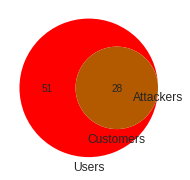

5. User login times


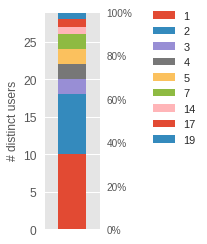



6. From 0 total attack records, 0 have a login time to be correlated with. The difference between the attack and the closest login time is on average nan, while the median is equal to nan


7. The number of distinct users that access this Booter via TOR is equal to 0


8. User distinct IP addresses


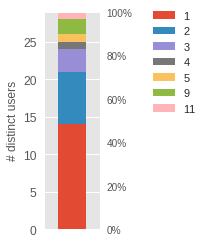

9. User distinct payments


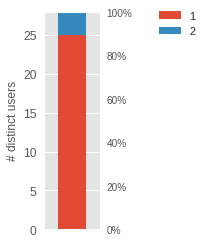

10. Amount of money paid.


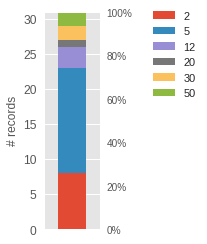



11. The (estimated) amount of money earned by this Booter is equal to US$ 307.00


12. Countries from where users (IPs) accessed the Booter.


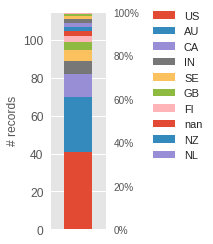

13. Countries of blacklisted IPs.


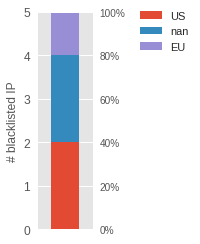

14. Target (IP) countries.
Unfortunately, there is no data available!

16. Who attacked whom in the country level.
Unfortunately, there is no data available!



In [134]:
%run '../automated_analysis.ipynb'

<h2 align="center">!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
Query Interface<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h2> 

In [70]:
%run '../search_background.ipynb'


Searching by Country = Netherlands 

Table df_logins (as ATTACKER):


,id,userid,userip,date,username,middledate,srcasn,srcip,srcbgp_prefix,srccountry,srcregistry,srcinfo_date,srcinfo_request,as_name
100,150,55861,213.10.153.98,2013-03-11 21:53:01,krew,2013-03-27 00:19:24.500000,286,213.10.153.98,213.10.128.0/17,NL,ripencc,NaN,2013-03-27 00:19:24.500000,"KPN , NL"
101,150,55861,213.10.153.98,2013-03-11 21:53:01,krew,2013-03-27 00:19:24.500000,1136,213.10.153.98,213.10.128.0/17,NL,ripencc,NaN,2013-03-27 00:19:24.500000,KPN This macro reflects our filtering-policy o...
